In [2]:
#Import dependency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import requests
import psycopg2
import config as creds


In [ ]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                 +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    #print("Connected!")

    #Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor


In [ ]:
# Connecting to DB

conn, cursor = connect()

# SQL command to create inventory table
sql = "select * from ames;"
#cursor.execute(sql)
df = pd.read_sql_query(sql, conn)
#conn.commit()
# dat = pd.read_sql_query(sql, conn)


**Final Data Cleaning before importing the dataset into our model**

In [ ]:
#Drop the ames_order, pid column since it doesn't help with prediction
df.drop(columns=["ames_order","pid"], axis=1, inplace=True)
df

**check histogram and see if they are normally distributed in order to be used in linear regression model --> transform the skewed numeric features by taking log(feature + 1) -->make features more normally distributed**

In [ ]:
#Check skewness of the dataset
from scipy.stats import skew 
skewness = numerical.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

In [ ]:
#normalize the data by taking log
skewness = np.log(skewness)
skewness.sort_values(ascending=False)

In [ ]:
# check if saleprice is normally distributed in order to be used in our Multiple linear regression model later
sns.distplot(df['saleprice']);
#we can see the saleprice is right skewed

# transform the the saleprice by taking log to make the data more normally distribute
df['saleprice'] = np.log1p(df['saleprice'])

In [ ]:
#check the distribution of garagearea
sns.distplot(df['garagearea']);

In [ ]:
#dropping any NA before putting the dataset into our model
df = df.dropna()
df.isnull().sum()

In [ ]:
#See the relationship between selected features and target
x_features = ["lotconfig", "neighborhood", "bldgtype", "foundation","total_area","overallqual","grlivarea", "garagecars","garagearea","totalbsmtsf","1stflrsf","fullbath","totrmsabvgrd", "yearbuilt","yearremodadd"]
for x in x_features:

  plt.scatter(df[x], df['saleprice'])
  plt.xlabel(x)
  plt.ylabel('selaprice')
  plt.show()

# **Initial Features Selection**
we selected 15 features.

***NUmerical Category:***
Based on heatmap, pick the top 11 features that are most correlated to sales price(vmax>0.5). We also added another additional features: total_area

* overallqual
* grlivarea	
* garagecars
* garagearea
* totalbsmtsf	
* 1stflrsf
* fullbath	
* totrmsabvgrd
* yearbuilt	
* yearremodadd
* ADDED total_area

***Categorical Category:***
Categorical object can not be compared using heatmap so we selected a few more features based on commonsense
* lotconfig
* neighborhood
* bldgtype
* foundation


In [ ]:
#Determine features and target
feature = df.drop(columns=['saleprice'])
target = df['saleprice']

print(feature)
print(target)

**Use Label Encoder to to transform categorical features**

In [ ]:
#Convert numerical categories that shouldn't be numerical to categorical categories
#please refer to the description file for definition of each category
df['mssubclass'] = df['mssubclass'].astype(str)
df['yrsold'] = df['yrsold'].astype(str)
df['mosold'] = df['mosold'].astype(str)
df['overallcond'] = df['overallcond'].astype(str)
df['overallqual'] = df['overallqual'].astype(str)
df.dtypes

In [ ]:
#check both numerical and categorical columns before further processing
numerical = df.select_dtypes(exclude='object')
numerical.columns

In [ ]:
categorical = df.select_dtypes('object')
categorical.columns

In [ ]:
#transform text into numerical data by applying LabelEncoder 
from sklearn.preprocessing import LabelEncoder
cols = ('mssubclass', 'mszoning', 'street', 'alley', 'lotshape', 'landcontour',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual',
       'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair',
       'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype',
       'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'poolqc',
       'fence', 'miscfeature', 'mosold', 'yrsold', 'saletype',
       'salecondition')

for col in cols:
  le = LabelEncoder()
  le.fit(list(df[col].values))
  df[col] = le.fit_transform(list(df[col].values))
df.shape  

# **Step 4: Multiple Linear Regression Model: Predict house prices based on the selected features**
* Set x and y
* Scale x and y
* Split the data into train and test (X:features, y=target)
* Create an instance of the model with model = LinearRegression().
* Train the model with the dataset with model.fit(X,y)
* Create predictions with y_pred = model.predict(X)


In [2]:
#put our selected features into a list
cols = ['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl',
       'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual',
       'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf',
       'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical',
       '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces',
       'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
       'screenporch']
#cols = ["lotconfig", "neighborhood", "bldgtype", "foundation","total_area","overallqual","grlivarea", "garagecars","garagearea","totalbsmtsf","1stflrsf","fullbath","totrmsabvgrd", "yearbuilt","yearremodadd"]
#try using only the numerical category
#cols = ["total_area","overallqual","grlivarea", "garagecars","garagearea","totalbsmtsf","1stflrsf","fullbath","totrmsabvgrd", "yearbuilt","yearremodadd"]#


#assign y to our target and x to our features 
y = df['saleprice'].values
X = df[cols]

#try using all the columns as features
# X = df.loc[:, df.columns != 'saleprice']

#scale the data
X_scaled = preprocessing.StandardScaler().fit_transform(X)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))


NameError: name 'df' is not defined

Perform 80/20 data split

In [3]:
#data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state= 0)
#check the shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'X_scaled' is not defined

**Fit data to our Multiple Linear Regression Model**

In [4]:
#define the model
model = linear_model.LinearRegression()
#build training model --> time start time 
start=datetime.now()
model.fit(X_train, y_train)

#time the end time
end=datetime.now()

#run prediction on test set 
y_test_pred = model.predict(X_test)


NameError: name 'X_train' is not defined

In [5]:
#print the coefficient, intercept, MSE and model score(R^2),and model run time
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared Error(MSE): {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Coefficient of Determination(R^2): {r2_score(y_test, y_test_pred):.2f}")
time_taken = end - start
print(f"Time to run the model: {time_taken}")

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
gboostRegressorModel = GradientBoostingRegressor(n_estimators=2500, random_state =0)
gboostRegressorModel.fit(X_train,y_train)
gboost_trainscore=gboostRegressorModel.score(X_train, y_train)
print("Training Accuracy of GradientBoosting Regression:",gboost_trainscore)

# Predict new result
y_pred_gbr = gboostRegressorModel.predict(X_test)

gboost_testscore=gboostRegressorModel.score(X_test, y_test)
print("Testing Accuracy of GradientBoosting Regression:",gboost_testscore)

NameError: name 'X_train' is not defined

In [7]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
nn_model.summary()
nn_model.compile(loss="mean_squared_error", optimizer="adam")
#time starting time
start_1=datetime.now()
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)
#time ending time
end_1=datetime.now()

y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

deep_model = tf.keras.models.Sequential()
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu"))
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
deep_model.summary()

deep_model.compile(loss="mean_squared_error", optimizer="adam")
#start deep learning starting time
start_2=datetime.now()
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)
#time deep learning ending time
end_2=datetime.now()
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages

NameError: name 'X_train' is not defined

In [8]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
time_taken_neu = end_1 - start_1
print(time_taken_neu)

time_taken_dl = end_2 - start_2
print(time_taken_dl)

NameError: name 'y_train' is not defined

# Models Comparison


In [39]:
plt.scatter(y_test, y_test_pred)
plt.show()

NameError: name 'y_test' is not defined

**Comparing Multiple Linear Regression VS Deep Learning in terms of model running time**

In [31]:

Model = ["MLR", "DL"]
Time = [0.0279, 13.86]
data_dict = {'Model': pd.Series(Model), 'Run Time':pd.Series(Time)}

df2 = pd.DataFrame(data_dict)
df2

,Model,Run Time
0,MLR,0.0279
1,DL,13.8600


<BarContainer object of 2 artists>

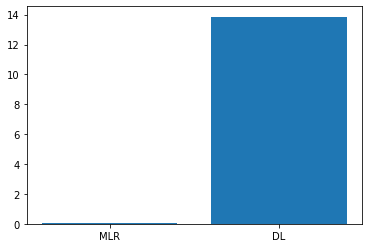

In [38]:
Features = ["11", "15", "79"]
x = ['MLR', 'DL']
y = [0.0279, 13.86]
plt.bar(x,y)

**Comparing Multiple Linear Regression VS Deep Learning in terms of R^2**

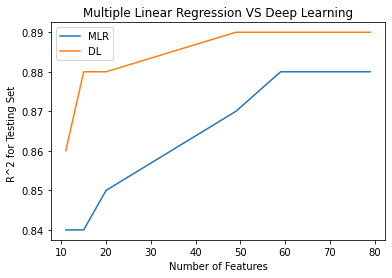

In [16]:
x = [11, 15, 20, 49, 59, 79]
MLR = [0.84, 0.84, 0.85, 0.87, 0.88, 0.88]
DL = [0.86, 0.88, 0.88, 0.89, 0.89, 0.89]
fig, ax = plt.subplots()
ax.plot(x,MLR, label='MLR')
ax.plot(x,DL, label='DL')
ax.set_title("Multiple Linear Regression VS Deep Learning")
ax.set_xlabel("Number of Features")
ax.set_ylabel("R^2 for Testing Set ")
ax.legend()

In [19]:
columns = [
    "Num_feat",
    "Model",
    "R^2",
    "Time"
]
rows = [
    (11, "MLR", 0.84, 0.0279),
    (11, "DL", 0.86, 6.86),
    (15, "MLR", 0.84, 0.00199),
    (15, "DL", 0.88, 7.12),
    (20, "MLR", 0.85, "NA"),
    (20, "DL", 0.88, "NA"),
    (49, "MLR", 0.87, "NA"),
    (49, "DL", 0.89, "NA"),
    (59, "MLR", 0.88, "NA"),
    (59, "DL", 0.89, "NA"),
    (79, "MLR", 0.88, "NA"),
    (79, "DL", 0.89, "NA")
]

In [23]:
model_info = pd.DataFrame(columns = columns, data=rows)
model_info.set_index("Num_feat", inplace=True)
model_info

,Model,R^2,Time
Num_feat,,,
11,MLR,0.84,0.0279
11,DL,0.86,6.86
15,MLR,0.84,0.00199
15,DL,0.88,7.12
20,MLR,0.85,NA
20,DL,0.88,NA
49,MLR,0.87,NA
49,DL,0.89,NA
59,MLR,0.88,NA
